In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv("C:/Users/Lenovo/Downloads/Amazon Sales data.csv")

In [3]:
# Display the first few rows of the DataFrame
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
# Step 2: Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()

In [5]:
# Check for duplicate records
duplicate_records = data.duplicated().sum()

In [6]:
# Display the results
missing_values, duplicate_records

(Region            0
 Country           0
 Item Type         0
 Sales Channel     0
 Order Priority    0
 Order Date        0
 Order ID          0
 Ship Date         0
 Units Sold        0
 Unit Price        0
 Unit Cost         0
 Total Revenue     0
 Total Cost        0
 Total Profit      0
 dtype: int64,
 0)

In [ ]:
# step 3: Exploratory Data Analysis (EDA)

In [7]:
# Summary statistics of numerical columns
summary_stats = data.describe()

In [8]:
# Distribution of sales channels
sales_channel_distribution = data['Sales Channel'].value_counts()

In [9]:
# Sales performance by region
region_sales = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

In [10]:
# Sales performance by country
country_sales = data.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10) # Top 10 countries

In [11]:
# Sales performance by item type
item_sales = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)

In [12]:
# Time series analysis of sales
data['Order Date'] = pd.to_datetime(data['Order Date'])
time_series_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Total Revenue'].sum()

In [13]:
# Visualizations
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Sales Channels')

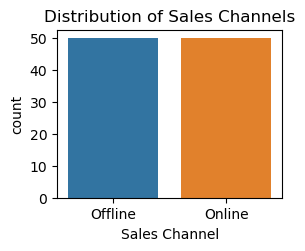

In [14]:
# Sales Channel Distribution
plt.subplot(2, 2, 1)
sns.countplot(x=data['Sales Channel'])
plt.title('Distribution of Sales Channels')

Text(0, 0.5, 'Total Revenue')

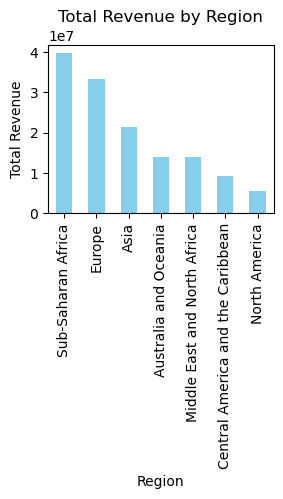

In [15]:
# Sales by Region
plt.subplot(2, 2, 2)
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.ylabel('Total Revenue')

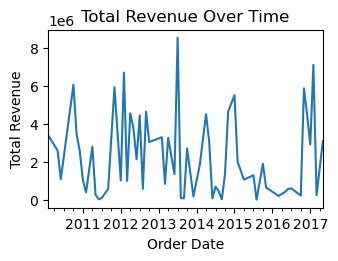

In [16]:
# Time Series Analysis
plt.subplot(2, 2, 4)
time_series_sales.plot()
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()

In [17]:
# Display summary statistics and top 10 countries by sales
summary_stats, sales_channel_distribution, region_sales, country_sales, time_series_sales

(           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
 count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
 mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
 std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
 min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
 25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
 50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
 75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
 max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   
 
          Total Cost  Total Profit  
 count  1.000000e+02  1.000000e+02  
 mean   9.318057e+05  4.416820e+05  
 std    1.083938e+06  4.385379e+05  
 min    3.612240e+03  1.258020e+03  
 25%    1.688680e+05  1.214436e+05  
 50%    3.635664e+05  2.907680e+05  
 75%    1.613870e+06  6.358288e+05  
 max    4.509794e+

In [18]:
# Seasonal Trends Analysis
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Total Revenue'].sum()
quarterly_sales = data.groupby(data['Order Date'].dt.to_period('Q'))['Total Revenue'].sum()

plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 0, 'Month')

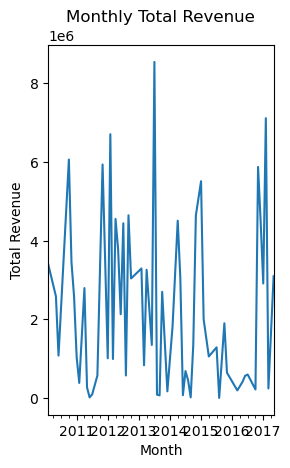

In [19]:
# Monthly Sales Trend
plt.subplot(1, 2, 1)
monthly_sales.plot()
plt.title('Monthly Total Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Month')


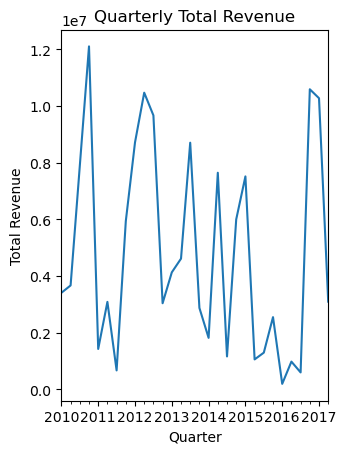

In [20]:
# Quarterly Sales Trend
plt.subplot(1, 2, 2)
quarterly_sales.plot()
plt.title('Quarterly Total Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Quarter')

plt.tight_layout()
plt.show()

In [21]:
# Profit Margin Analysis
data['Profit Margin'] = (data['Total Profit'] / data['Total Revenue']) * 100

# Profit Margin by Item Type
item_profit_margin = data.groupby('Item Type')['Profit Margin'].mean().sort_values(ascending=False)

# Profit Margin by Region
region_profit_margin = data.groupby('Region')['Profit Margin'].mean().sort_values(ascending=False)

# Profit Margin by Sales Channel
sales_channel_profit_margin = data.groupby('Sales Channel')['Profit Margin'].mean().sort_values(ascending=False)

In [22]:
# Visualizations
plt.figure(figsize=(14, 8))


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

Text(0, 0.5, 'Profit Margin (%)')

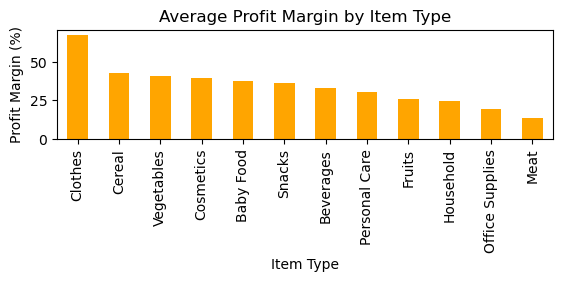

In [23]:
# Profit Margin by Item Type
plt.subplot(3, 1, 1)
item_profit_margin.plot(kind='bar', color='orange')
plt.title('Average Profit Margin by Item Type')
plt.ylabel('Profit Margin (%)')

Text(0, 0.5, 'Profit Margin (%)')

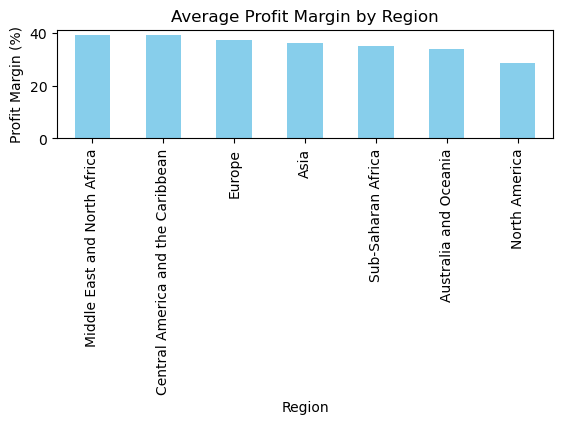

In [24]:
# Profit Margin by Region
plt.subplot(3, 1, 2)
region_profit_margin.plot(kind='bar', color='skyblue')
plt.title('Average Profit Margin by Region')
plt.ylabel('Profit Margin (%)')

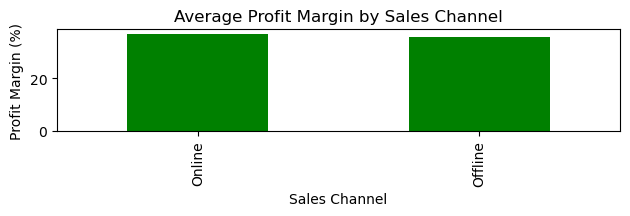

In [25]:
# Profit Margin by Sales Channel
plt.subplot(3, 1, 3)
sales_channel_profit_margin.plot(kind='bar', color='green')
plt.title('Average Profit Margin by Sales Channel')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

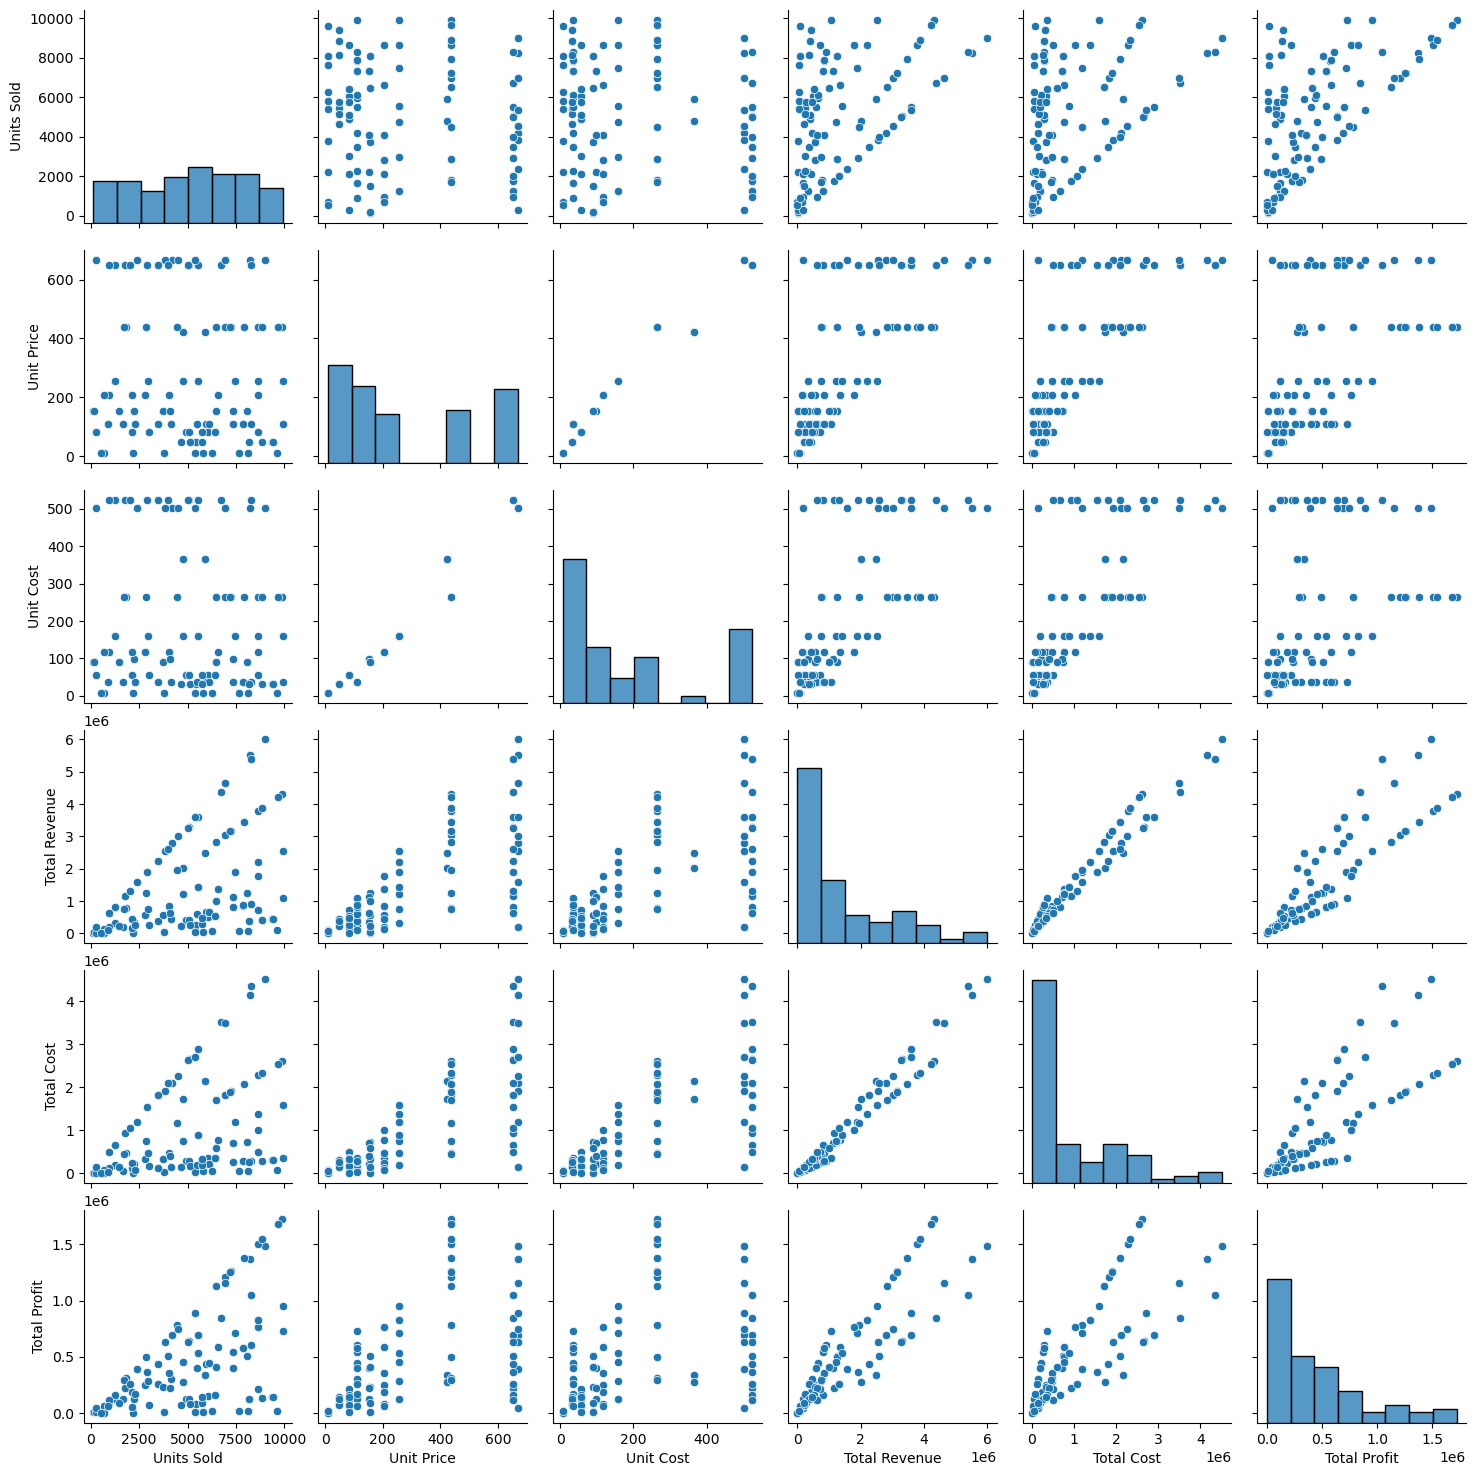

In [26]:
# Pairplot to visualize relationships
sns.pairplot(data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']])
plt.show()

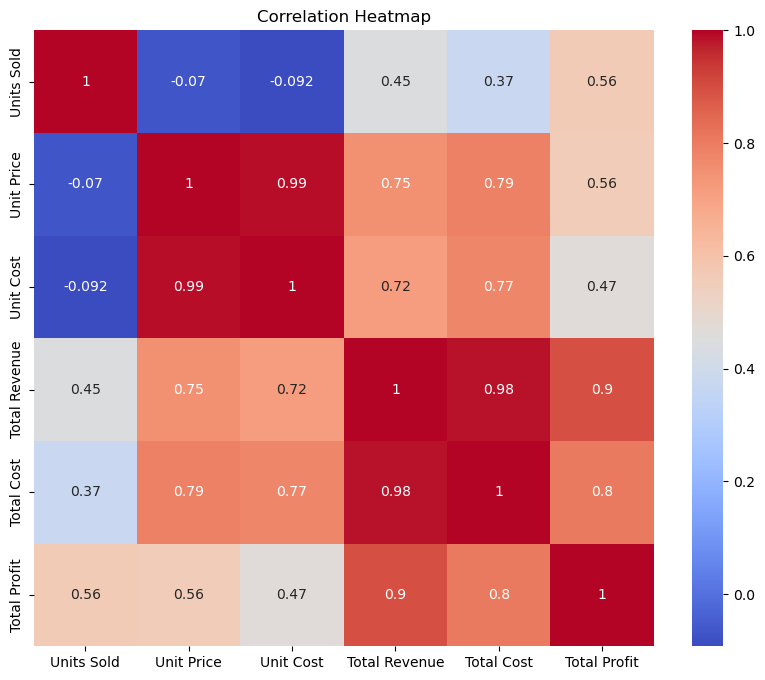

In [27]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Convert Order Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [30]:
# Drop any rows with missing values
data = data.dropna()

In [31]:
# Select relevant features for predicting Total Profit
features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost']
target = 'Total Profit'

In [32]:
# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1.2579190760312865e-18
R^2 Score: 1.0


In [36]:
# Example prediction
new_data = pd.DataFrame({
    'Units Sold': [100],
    'Unit Price': [150],
    'Unit Cost': [100],
    'Total Revenue': [15000],
    'Total Cost': [10000]
})

# Standardize the new data
new_data_scaled = scaler.transform(new_data)

# Make prediction
predicted_profit = model.predict(new_data_scaled)
print(f'Predicted Total Profit: {predicted_profit[0]}')


Predicted Total Profit: 4999.999999999069
